<img src="https://beyondthestates.com/wp-content/uploads/2023/09/download.png" width=20% height=20%>

# Higher Diploma in Data Analytics course from [ATU](https://www.atu.ie/) in Winter 2024/25
##  Programming for Data Analytics - project 2024/2025
***



<div style="text-align:center">
<img src="img/Wind_turbines.jpg" width=60% height=80%>
<div style="text-align:center; font-size:10px;"><b>by stockertui @vecteezy.com </b>
</div>

## Project Overview 
***

In this project I need to demonstrate a data analysis of the wind speed in one of the Ireland's regions.
I will analyze 70 years of historical wind speed data from the Roches Point weather station in County Cork, Ireland. The data, sourced from the [Met Éireann historical dataset](https://www.met.ie/climate/available-data/historical-data), spans from January 1955 to December 2024, has the potential of providing a comprehensive range for long-term trend analysis,  seasonal variations, and other patterns relevant to wind speed and energy production.

Roches Point Station is located at the southeastern tip of County Cork, near the entrance to Cork Harbour, a strategic coastal location that often experiences significant wind activity.
The station records meteorological data such as wind speed, temperature, and precipitation at hourly intervals, making it suitable for detailed analysis.
Its coastal location provides valuable insights into wind patterns influenced by the Atlantic Ocean, making it relevant for assessing wind energy potential in Ireland.

Here's what the dataset contains: 

- date:  -  Date and Time (utc)
- rain:  -  Precipitation Amount (mm)
- temp:  -  Air Temperature (C)
- wetb:  -  Wet Bulb Temperature (C)
- dewpt: -  Dew Point Temperature (C)
- vappr: -  Vapour Pressure (hPa)
- rhum:  -  Relative Humidity (%) 
- msl:   -  Mean Sea Level Pressure (hPa)
- wdsp:  -  Mean Wind Speed (kt)
- wddir: -  Predominant Wind Direction (deg)
- ind:   -  Indicator

To perform the analysis I will need data from `date`, and `wdsp`. 


## Project Goal
***

The primary goal of this project is to analyze wind speed data `wdsp` to assess its potential for wind energy generation and explore historical trends and patterns. By focusing on one location and utilizing this long-term dataset, I will address the following key questions:

- Is my dataset ready for the analysis or it needs to be cleaned, preprocessed and/or normalised?
    -   Are there missing values and how these can be handled
    -   Can large gaps in dataset be filled with synthetic data
- How do wind speeds vary seasonally and annually at Roches Point?
- Are there noticeable trends in wind speeds over the past 70 years?
- What is the potential wind energy output for this location based on historical data?


To perform this analysis I will use [Python](https://en.wikipedia.org/wiki/Python_programming_language) and its libraries: 

[Pandas](https://pandas.pydata.org/) :
- Used to handle and preprocess the dataset (e.g., reading the CSV file, converting dates, grouping data).

[Matplotlib](https://matplotlib.org/) :

- Used for creating plots to visualize trends and regression results.

[Scikit-Learn](https://scikit-learn.org/stable/index.html) :

- Used to build and fit the linear regression model.

[NumPy](https://numpy.org/) :

- Helps with numerical calculations.

## Table of contents:

- [Higher Diploma in Data Analytics course](https://github.com/mondbr/PFDA_project)
   - [Programming for Data Analytics - project 2024/2025](https://github.com/mondbr/PFDA_project/blob/main/analysis.ipynb)
      - [Project Overview](#project-overview)
      - [Project Goal](#project-goal)
      - [Data Exploration](#data-exploration)
        - [Importing required Libraries](#importing-required-libraries)
        - [Loading and Inspecting the Data](#loading-and-inspecting-the-data)
        - [Data Cleaning](#data-cleaning)
        - [Creating, formatting, and manipulating date and time objects](#creating-formatting-and-manipulating-date-and-time-objects)
        - [Checking missing values](#checking-missing-values)
        - [Handling missing data and data gaps](#handling-missing-data-and-data-gaps)
          - [Interpolation](#interpolation)
          - [Correlation and Scikit learn](#correlation-and-scikit-learn)
            - [Simple Imputer](#simple-imputer)
            - [Iterative Imputer](#iterative-imputer)
            - [K-Nearest Neighbors (KNN) Imputer](#k-nearest-neighbors-knn-imputer)
        - [Comparision of Data filling methods](#comparision-of-data-filling-methods)
      - [Windspeed Analysis](#windspeed-analysis)
        - [Overview filled data](#overview-filled-data)
        - [Basic Statistics](#basic-statistics)
        - [Trends in windspeed](#trends-in-windspeed)
        - [Potential Wind Energy](#potential-wind-energy)
      - [References](#references)

## Data Exploration

### Importing required Libraries
***


Let's import all necessary libraries that will be useful for my analysis and plotting. 

In [181]:
import pandas as pd

In [182]:
import numpy as np

In [183]:
import matplotlib.pyplot as plt

In [184]:
import seaborn as sns

### Loading and Inspecting the Data
***
The dataset will be loaded into a Python environment using the `pandas` library. After loading, the data will be inspected for its structure, including column names, data types, and missing values.

Our dataset is saved in .csv file in this repository in `data` directory. After inspecting the data by reviewing the file, I need to ignore first 17 rows as they contain description elements and they are not part of the dataset, therefore they can be ignored. 

In [185]:
df = pd.read_csv('data/hly1075.csv', skiprows=17, low_memory=False) # https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,01-dec-1955 01:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1,01-dec-1955 02:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
2,01-dec-1955 03:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


Let's check the the data type of each column

In [186]:
df.dtypes

print(df.dtypes)

date     object
ind       int64
rain     object
ind.1     int64
temp     object
ind.2     int64
wetb     object
dewpt    object
vappr    object
rhum     object
msl      object
ind.3     int64
wdsp     object
ind.4     int64
wddir    object
dtype: object


As we can see column `wdsp` is showing as objects which means that might have contains other values than a float. Let's check the NaN values: 

In [187]:
# Check for missing values
nan_values = df.isna()

print(nan_values)

         date    ind   rain  ind.1   temp  ind.2   wetb  dewpt  vappr   rhum  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
585546  False  False  False  False  False  False  False  False  False  False   
585547  False  False  False  False  False  False  False  False  False  False   
585548  False  False  False  False  False  False  False  False  False  False   
585549  False  False  False  False  False  False  False  False  False  False   
585550  False  False  False  False  False  False  False  False  False  False   

          msl  ind.3   wdsp  ind.4  wdd

In [188]:
# Count missing values
df.isnull().sum()

print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


After using basic functions `df.isnull()` that shows True/False for missing values and `df.isnull().sum()` that shows total missing values per column, we can see that there is no missing/empty cells in this dataset. That would mean the cells that contain no data are not empty or zeroed, but they might contain a string placeholder for no-data cells. For more information you can look [here](https://saturncloud.io/blog/how-to-check-if-a-particular-cell-in-pandas-dataframe-is-null/#:~:text=Checking%20for%20Null%20Values%20in%20Pandas%20DataFrame&text=To%20check%20for%20null%20values%20in%20a%20pandas%20DataFrame%2C%20we,cell%20is%20null%20or%20not.).

To find out, I will use the `unique()` function in Pandas. It is used to find all the distinct or unique values in a specific column. After running it, we can quickly understand the variety of values present in data, which in this case is a white space. For more information, you can look at documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.unique.html).

In [189]:
# Get unique values in the Mean Wind Speed column
unique_wdsp = df['wdsp'].unique()

print(unique_wdsp)

['16' '11' '9' '5' '12' '15' '13' '14' '7' '4' '3' '6' '1' '0' '21' '19'
 '23' '22' '20' '8' '2' '17' '18' '10' '25' '29' '26' '24' '27' '28' '30'
 '31' '36' '32' '33' '34' '40' '41' '42' '38' '35' '46' '48' '44' '37'
 '39' '43' '47' '50' '53' '54' '45' '51' '55' '49' '52' '59' '56' ' ' '62'
 '60']


As we can see in the range of unique values, in both columns appears to be `' '` value, which is a white space. That is why our data type was shown as object. To be able to use this data for analysing, I need to clean this data. 
I will create a new dataset `cleandf`. It will replace white spaces with `NaN` and then drop them from my dataset. 



### Data Cleaning
***

In [190]:
# Make a copy of the dataframe
cleandf = df[['wdsp']].copy() # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

# Replace spaces with NaN for both columns
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan)

In [191]:
# Count missing values
cleandf.isnull().sum()


print(f'Number of NaN Values: {cleandf.isnull().sum()}')

Number of NaN Values: wdsp    333
dtype: int64


As there is only small amount of NaN values in entire `wdsp` column, let's drop the values from our dataset.

In [192]:
# Drop rows with NaN in 'wdsp'
cleandf.dropna(subset=['wdsp'], inplace=True)

# Convert 'wdsp' to float as it is not updating itself
cleandf['wdsp'] = cleandf['wdsp'].astype(float)


Let's check in once again: 

In [193]:
# Check for missing values
nan_values = cleandf.isna()

print(nan_values)

         wdsp
0       False
1       False
2       False
3       False
4       False
...       ...
585546  False
585547  False
585548  False
585549  False
585550  False

[585218 rows x 1 columns]


In [194]:
# Count missing values
cleandf.isnull().sum()

print(f'Number of NaN Values: {cleandf.isnull().sum()}') # 0 means there are no NaN values

Number of NaN Values: wdsp    0
dtype: int64


Now let's the the data type:

In [195]:
# Checking the data type of each column
cleandf.dtypes

print(cleandf.dtypes)

wdsp    float64
dtype: object


Since in my data frame I have only one column so far, I can tell that `wdsp` column is showing correct data type `float` which means floating-point numbers in Python (numbers with decimals). 

Now, I want to see if there are any `0` values in my dataset.  A `0` wind speed might indicate calm weather, but let see how many zero values is my dataset and how they are distributed as they might represent no values at all, rather than no wind. 

In [196]:
# count the number of zeros in 'wdsp' column
zero_count_df = (cleandf['wdsp'] == 0).sum()

print(f"Number of zeros in 'wdsp' column is: {zero_count_df}")

Number of zeros in 'wdsp' column is: 80282


As there is significant number of zero values, I want to see how they are distributed in my dataset to see if they might indicate missing values or just no-wind weather. However, before I do that, I need to make sure that I have access to properly formatted date and time so I could use it for my analysis. 

### Creating, formatting, and manipulating date and time objects
***

I need to focus on date and time values that are crucial for my data analysis. Let's see how the date and time is presented in this dataset. I need to look at my original data frame. 

In [197]:
df['date'].head()

0    01-dec-1955 01:00
1    01-dec-1955 02:00
2    01-dec-1955 03:00
3    01-dec-1955 04:00
4    01-dec-1955 05:00
Name: date, dtype: object

Date and time are stored together in single column, so it can limit the flexibility of my analysis. Splitting them into separate columns can allow me to use this data in more efficient way.  

I will convert date column from original dataset from string format to a datetime object using `datetime` module from Pandas. 

In [198]:
# Converting the date column from string format ('DD-MMM-YYYY HH:MM:SS') to datetime object
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')


Let's see now:

In [199]:
df['datetime'].head()

0   1955-12-01 01:00:00
1   1955-12-01 02:00:00
2   1955-12-01 03:00:00
3   1955-12-01 04:00:00
4   1955-12-01 05:00:00
Name: datetime, dtype: datetime64[ns]

Although the column looks very similar, the data type of date and time has changed. After using `pd.to_datetime()`, it converts the string into a datetime object, which has a standard ISO format (YYYY-MM-DD HH:MM:SS) which is the [default datetime representation in pandas](https://sparkbyexamples.com/pandas/how-to-format-pandas-datetime/#:~:text=DateTime%20in%20pandas.-,Pandas%20Format%20DateTime%20from%20YYYY%2DMM,DD%20to%20DD%2DMM%2DYYYY&text=The%20default%20DateTime%20format%20for,parse%20with%20the%20day%20first.). 

### Checking missing values
***

After completing above steps we prepared and cleaned some data by handling NaN values and date and time. Keeping in mind that we have a large amount of `0` values to be addressed, let's do some basic plots to visualise the data we have. 
 

In [200]:
# Adding the 'datetime' column to the new dataframe 'cleandf'
cleandf['datetime'] = df['datetime']

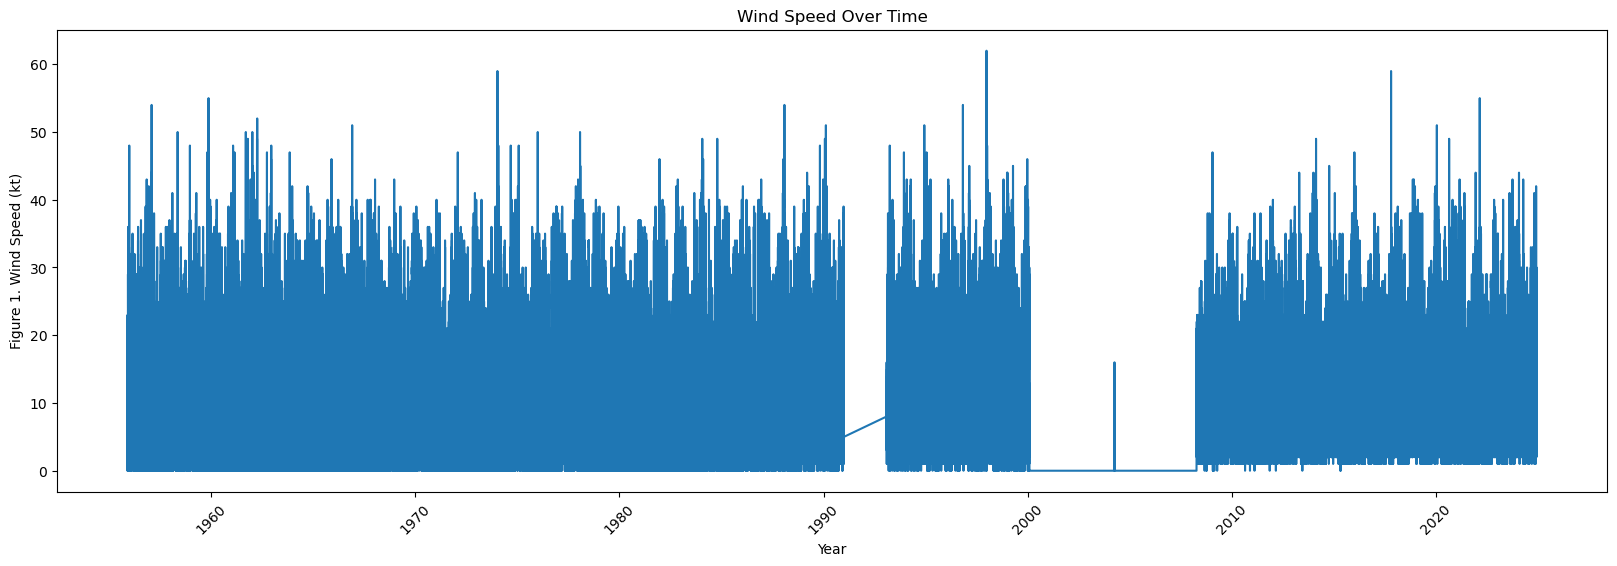

In [201]:

# Splitting the 'datetime' into 'date' and 'time'
cleandf['date'] = cleandf['datetime'].dt.date
cleandf['time'] = cleandf['datetime'].dt.time


# Creating a plot for temperature over time 
plt.figure(figsize=(20, 6))
plt.plot(cleandf['datetime'], cleandf['wdsp'], label='Wind Speed')
plt.xlabel('Year')
plt.ylabel('Figure 1. Wind Speed (kt)')
plt.title('Wind Speed Over Time')

plt.xticks(rotation=45)

plt.show()


As we can see on the plot, it appears to be small amount of data unavailable just after 1990 and no wind speed data between year 2000 and 2008. We can understand that there is no data at all rather than a calm weather for a long period of time. To perform further analysis, I need to somehow handle this missing data and either drop them or fill them in using available techniques. Let's do some additional plots, as this might be useful in the next step to compare filled values with original data. 

Let's plot monthly average and annual average wind speed with original data. 

In [202]:
# Extracting the month from the 'datetime' column
cleandf['month'] = cleandf['datetime'].dt.month


Now I want to verify that my new dataframe `cleandf` contains the necessary columns, including wind speed `wdsp` and the newly added month.

In [203]:
# checking the first few rows of the new dataframe
print(cleandf.head())

# Checking the columns of the new dataframe
print(cleandf.columns) 

   wdsp            datetime        date      time  month
0  16.0 1955-12-01 01:00:00  1955-12-01  01:00:00     12
1  11.0 1955-12-01 02:00:00  1955-12-01  02:00:00     12
2   9.0 1955-12-01 03:00:00  1955-12-01  03:00:00     12
3   5.0 1955-12-01 04:00:00  1955-12-01  04:00:00     12
4  12.0 1955-12-01 05:00:00  1955-12-01  05:00:00     12
Index(['wdsp', 'datetime', 'date', 'time', 'month'], dtype='object')


The `datetime` module represents the numerical month, therefore December is represented as 12, January as 1, February as 2 and so on. I found this information in the documentation [here](https://docs.python.org/3/library/datetime.html).

Let's see the average wind speed for Roches Point for each month across our data:

In [204]:
# Grouping by month and calculating the mean wind speed
monthly_avg_original = cleandf.groupby('month')['wdsp'].mean()

# printing the monthly average wind speed
print(monthly_avg_original)

month
1     12.352912
2     12.129073
3     11.484016
4     10.374940
5      9.945849
6      9.342558
7      9.056184
8      9.306160
9      9.866520
10    11.095308
11    11.557909
12    12.514137
Name: wdsp, dtype: float64


To visualise the above trends, let's plot it using line plot. I will use `matplotlib.pyplot` library that I imported before. 
For better plotting I am using `monthly_avg_original.index` for x-axis (months) and `monthly_avg_original.values` for the y-axis (mean wind speeds). This ensures that each month is correctly paired with its corresponding mean wind speed. The `.index` represents the unique values of the `month` column (1 to 12) and the `.values` represents the corresponding mean wind speed `wdsp` for each month. I found this information at [askpython.com](https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis) 

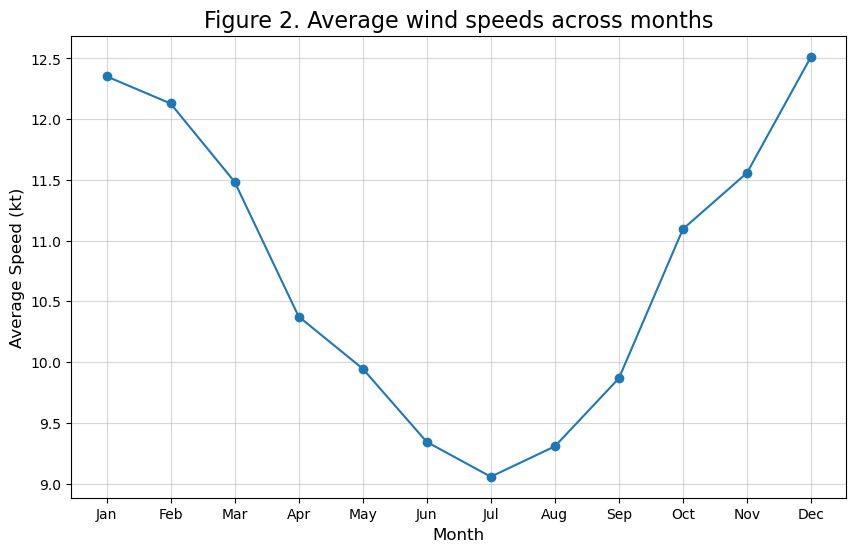

In [205]:
# Plotting the monthly average wind speed
plt.figure(figsize=(10, 6))

# line plot
plt.plot(monthly_avg_original.index, monthly_avg_original.values, marker='o')

# adding title and labels
plt.title('Figure 2. Average wind speeds across months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)

# setting the x-axis labels to the month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# adding grid for better visibility
plt.grid(alpha=0.5)


Looking at the above plot, we can notice seasonal variations, however we have to keep in mind that these values might not show us the reality as we have large amount of zero values that can underestimate the result. Let's check how wind speeds vary annually at Roches Point. To do this, I need to create a new column in the data frame to store the year, then group the data by the year column and calculate the mean of the wind speed for each year. 

In [206]:
# Extracting the year from the datetime column
cleandf['year'] = cleandf['datetime'].dt.year

# Grouping by month and calculating the mean wind speed
annual_avg_original = cleandf.groupby('year')['wdsp'].mean()

# printing the monthly average wind speed
print(annual_avg_original)

year
1955    14.767160
1956    12.110997
1957    11.839155
1958    11.665297
1959    11.964612
          ...    
2020    13.123862
2021    11.782877
2022    12.417009
2023    12.360731
2024    12.333168
Name: wdsp, Length: 69, dtype: float64


To visualise the output of how wind speeds vary annually, I will create a line plot.

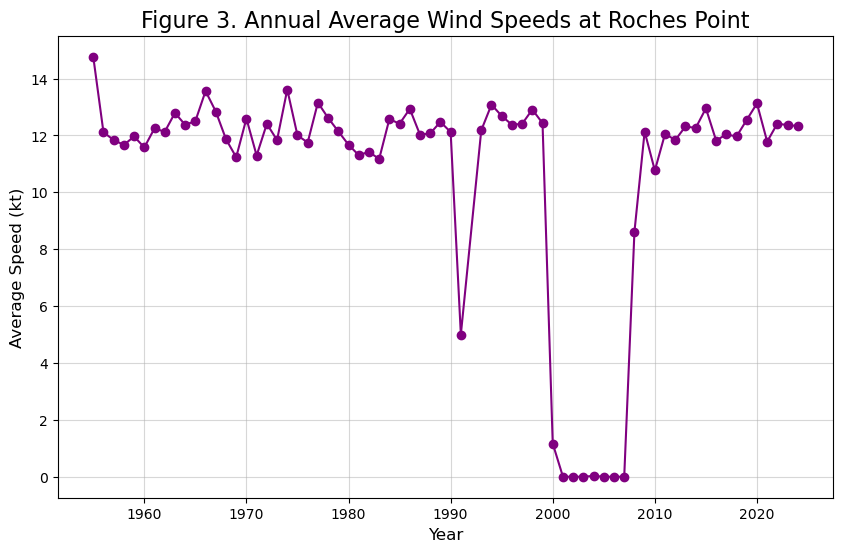

In [207]:
# Plotting the annual average wind speeds
plt.figure(figsize=(10, 6))

# line plot
plt.plot(annual_avg_original.index, annual_avg_original.values, marker='o', color='purple')

# adding labels, title and grid
plt.title('Figure 3. Annual Average Wind Speeds at Roches Point', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)

As we can see, there are similar results as in a plot in `Figure 1.` There are no wind speed data for years 2000 to 2008. Let's check how much 'zeroes' of our total zero values falls within the year range 2000-2008. 

In [208]:
# lets see the number of zeros in the 'wdsp' column again

zero_count = (cleandf['wdsp'] == 0).sum()

print(f"Number of zeros in 'wdsp' column is: {zero_count}")


Number of zeros in 'wdsp' column is: 80282


In [209]:
# Filter the DataFrame for rows between 2000 and 2008
filtered_df = cleandf[(cleandf['datetime'].dt.year >= 2000) & (cleandf['datetime'].dt.year <= 2008)] # https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

# Count the number of zeros in the 'wdsp' column within the filtered range
zero_count_filtered = (filtered_df['wdsp'] == 0).sum() # https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe

# Calculate the percentage
percentage = (zero_count_filtered / zero_count) * 100

# Display the count of zeros
print(f'Number of zeros in "wdsp" between 2000-2008: {zero_count_filtered}')
print(f'Percentage of total zero values between 2000-2008: {percentage:.2f}%') # https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points

Number of zeros in "wdsp" between 2000-2008: 70782
Percentage of total zero values between 2000-2008: 88.17%


### Handling missing data and data gaps
***

As we can see, majority (88.17%) of our zero values are falling into years 2000 and 2008. It is another type of missing data in this dataset (apart of with white spaces that we handled already). There are few options of how to approach this issue:

1. ***Interpolate Missing Data*** - interpolation will fill in the missing values based on trends from other years. This works well if the missing period is small and the overall data is stable. See [askpython.com](https://www.askpython.com/python/examples/interpolation-to-fill-missing-entries)

2. ***Scikit-learn models*** - offers flexible and advanced imputation techniques, like KNN regression-based methods and types of imputers, to handle missing values while considering relationships between features. See [scikit-learn.org](https://scikit-learn.org/stable/supervised_learning.html)

3. ***Drop the Missing Period***: Exclude the missing years from the analysis, but if the gap is too large it might twist results.

The best approach depends on the importance of data accuracy for the analysis and the potential impact of missing data on the results. 

As there is significant number of data missing, the dropping them would not be the best option as we can lost accuracy of the data such as seasonal patterns, loss of consistency and integrity. 
The winds speeds are typically seasonal and show smooth trends over time, so let's try filling the missing years using a couple of techniques I explored, and then select the best one for analysis.


#### Interpolation
***


There are few interpolation techniques to estimate unknown data points between two known data points. In Python, Interpolation Formula is a technique mostly used to impute missing values in the data frame or series while preprocessing data. We can recognise some of the following techniques: 

- ***Nearest neighbor*** : assigns the value of the closest known data point to an unknown point.
- ***Linear Interpolation*** : estimates values by connecting two known points with a straight line and using the line to estimate the unknown value. 
- ***Polynomial Interpolation*** : fits a single polynomial of degree n-1 through n data points to estimate values for intermediate points.
- ***Time-based Interpolation*** : estimates values based on the temporal relationship between known data points, often used for time series data.

I learned about interpolation and its techniques at the website [analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/)

I would like to try using time-based interpolation, as I have a datetime index and wind speed values `wdsp` that change over time.

For better and clearer data interpretation, I will replace now `0` with `NaN` values as I am assuming that `0` indicates a missing value in the dataset. I will create a new copy of my dataframe for interpolation.

In [210]:

# creating a copy of the dataframe
time_interp_df = cleandf.copy()

# Replace 0 values in the 'wdsp' column with NaN
time_interp_df['wdsp'] = time_interp_df['wdsp'].replace(0, np.nan)


Now I should see number of NaN values: 

In [211]:
# Count missing values
time_interp_df.isnull().sum()
print(time_interp_df.isnull().sum())


print("\n Missing values before interpolation:")
print(time_interp_df['wdsp'].isna().sum())

wdsp        80282
datetime        0
date            0
time            0
month           0
year            0
dtype: int64

 Missing values before interpolation:
80282


I set up `time_interp_df` as index to tell pandas to treat the data as time-based (actual time intervals between the data points), enabling time-sensitive interpolation on the `wdsp` column.

In [212]:
# Set the 'datetime' column as the index
time_interp_df.set_index('datetime', inplace=True) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html


In [213]:
# lets see the head of the new dataframe after index set
print(time_interp_df.head())

                     wdsp        date      time  month  year
datetime                                                    
1955-12-01 01:00:00  16.0  1955-12-01  01:00:00     12  1955
1955-12-01 02:00:00  11.0  1955-12-01  02:00:00     12  1955
1955-12-01 03:00:00   9.0  1955-12-01  03:00:00     12  1955
1955-12-01 04:00:00   5.0  1955-12-01  04:00:00     12  1955
1955-12-01 05:00:00  12.0  1955-12-01  05:00:00     12  1955


Now, let's replace all NaN values in the `wdsp` column with interpolated values. 

In [214]:
# Replace all NaN values in the 'wdsp' column with interpolated values
time_interp_df['wdsp'] = time_interp_df['wdsp'].interpolate(method='time') # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html


Let's check number of NaN values. Zero NaN values means that all missing data was filled in.

In [215]:
# Count missing values
time_interp_df.isnull().sum()
print(time_interp_df.isnull().sum())


print("\n Missing values after interpolation:")
print(time_interp_df['wdsp'].isna().sum())

wdsp     0
date     0
time     0
month    0
year     0
dtype: int64

 Missing values after interpolation:
0


When I set `datetime` as the index, it is no longer available as a regular column. To fix this issue, I need to reset the index before referencing the datetime column again as I want to plot the results.

In [216]:
# Reset the index to bring 'datetime' back as a column
time_interp_df.reset_index(inplace=True)

Now let's plot the result.

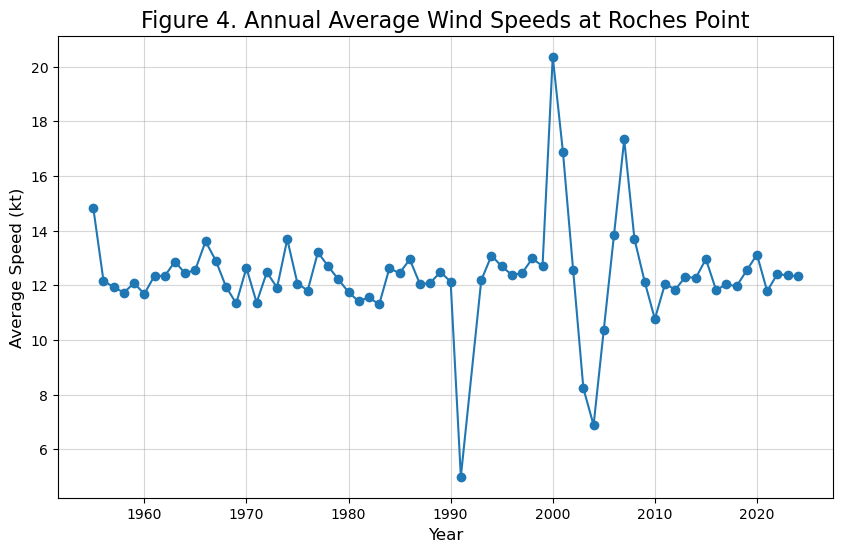

In [217]:
# Extract the year from the datetime column
time_interp_df['year'] = time_interp_df['datetime'].dt.year 

# Group by year and calculate the mean wind speed
annual_avg_time_interp = time_interp_df.groupby('year')['wdsp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_time_interp.index, annual_avg_time_interp.values, marker='o', label='Annual Average Wind Speeds')

# Add labels, title, and grid
plt.title('Figure 4. Annual Average Wind Speeds at Roches Point', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)

We can see that data between years 2000 and 2008 was filled in. The above plot indicates that the interpolation may not have properly captured the variations in wind speeds between 2000 and 2008, as they show extreme deviations comparing to the previous and later years. This might be because gaps takes months, so the interpolated values may not reflect reality. Let's check another technique - **Scikit-learn**. 

#### Correlation and Scikit-learn
***


Scikit-learn is an open-source Python library that provides simple and efficient tools for data analysis and machine learning, including algorithms for classification, regression, clustering, and dimensionality reduction.

**Scikit-learn methods:**

-  [Simple Imputer](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html): can replace missing values with the below numbers, however, it does not account for time relationships or other features:
    - Mean
    - Median
    - Most Frequent Value
    - Constant Value
    
- [Iterative Imputer](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.IterativeImputer.html): uses more sophisticated approach by modeling each feature with missing values as a function of the other features in a round-robin fashion, essentially performing iterative imputation. Correlation check might be useful here strong relations between columns might indicate that the imputer can more accurately predict missing values based on these relationships.

- [K-Nearest Neighbors (KNN) Imputer](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.KNNImputer.html) - estimates missing values based on the nearest neighbors in the dataset.


- [Regression-Based Imputation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html) - regression models (e.g., Linear Regression, Random Forest) can predict and fill gaps based on other features. Correlation check is very important.  Features that are highly correlated with the column containing missing values are more likely to be used in predicting the missing values.



To decide which method I'll use, I will check if there is significant correlation between any wind speed `wdsp` and any column in my dataset. 

I will be using the original dataset and drop `date` and datetime `columns` as they are not necessary in correlation calculation.

In [218]:
# create a new dataframe without the date columns for correlation
corr_df = df.drop(columns=['date','datetime']).copy()


As we already know that data contains white spaces, let's replace them with NaN values and count them. 

In [219]:
# Replace spaces with NaN for the columns
corr_df = corr_df.replace(' ', np.nan)


# Check for remaining NaN values 
print('Number of missing values in each column:')
print(corr_df.isna().sum())

Number of missing values in each column:
ind          0
rain       330
ind.1        0
temp     18722
ind.2        0
wetb     26434
dewpt    26434
vappr    49543
rhum     49540
msl      32806
ind.3        0
wdsp       333
ind.4        0
wddir      575
dtype: int64


In [220]:
# checking the data type of each column as the original data type has not been changed after replacing the spaces with NaN
print(corr_df.dtypes)

ind       int64
rain     object
ind.1     int64
temp     object
ind.2     int64
wetb     object
dewpt    object
vappr    object
rhum     object
msl      object
ind.3     int64
wdsp     object
ind.4     int64
wddir    object
dtype: object


As the correlation can only be performed on numeric columns (e.g., integers, floats), if my dataframe contains non-numeric data (such as strings or objects), pandas will not be able to compute the correlation matrix. See [w3schools.com](https://www.w3schools.com/python/pandas/pandas_correlations.asp)

In [221]:
# convert all columns to float for correlation
corr_df = corr_df.astype(float)

print(corr_df.dtypes)

ind      float64
rain     float64
ind.1    float64
temp     float64
ind.2    float64
wetb     float64
dewpt    float64
vappr    float64
rhum     float64
msl      float64
ind.3    float64
wdsp     float64
ind.4    float64
wddir    float64
dtype: object


Because there is a large number of missing values in the dataset, this could cause issues when calculating correlations. I will handle this by [forward filling of missing values](https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/). It is another method of imputing missing values in a dataset by replacing them with the most recent non-missing value before them in the same column.

In [222]:
# fill missing values with the mean of the column
df_filled = corr_df.fillna(corr_df.mean()) # forwards fill


In [223]:
# Check for remaining NaN values after filling 
print('Number of missing values in each column after "forward filling":')
print(df_filled.isna().sum())

Number of missing values in each column after "forward filling":
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


As I am happy with above result, let's calculate the correlation. 

In [224]:
# Calculate the correlation matrix
correlation_matrix = df_filled.corr()

# Display the correlation matrix
print(correlation_matrix)

            ind      rain     ind.1      temp     ind.2      wetb     dewpt  \
ind    1.000000 -0.079948 -0.063116 -0.126930 -0.039791 -0.088348 -0.044744   
rain  -0.079948  1.000000 -0.000105 -0.003596 -0.000826  0.038467  0.078385   
ind.1 -0.063116 -0.000105  1.000000 -0.015669  0.853179 -0.006750 -0.006544   
temp  -0.126930 -0.003596 -0.015669  1.000000 -0.155864  0.925511  0.858942   
ind.2 -0.039791 -0.000826  0.853179 -0.155864  1.000000 -0.038878 -0.025182   
wetb  -0.088348  0.038467 -0.006750  0.925511 -0.038878  1.000000  0.950557   
dewpt -0.044744  0.078385 -0.006544  0.858942 -0.025182  0.950557  1.000000   
vappr -0.041775  0.074171 -0.004816  0.825236 -0.018720  0.915014  0.956491   
rhum   0.167939  0.179863 -0.000695 -0.064424 -0.006659  0.140746  0.360806   
msl    0.012399 -0.193859  0.000370  0.077864  0.003969  0.044580  0.011933   
ind.3 -0.074763  0.037456 -0.004567  0.033607  0.001611  0.034158  0.023078   
wdsp  -0.017181  0.182720  0.051274 -0.034993  0.053

Let's visualise that: 

<Figure size 1000x1000 with 0 Axes>

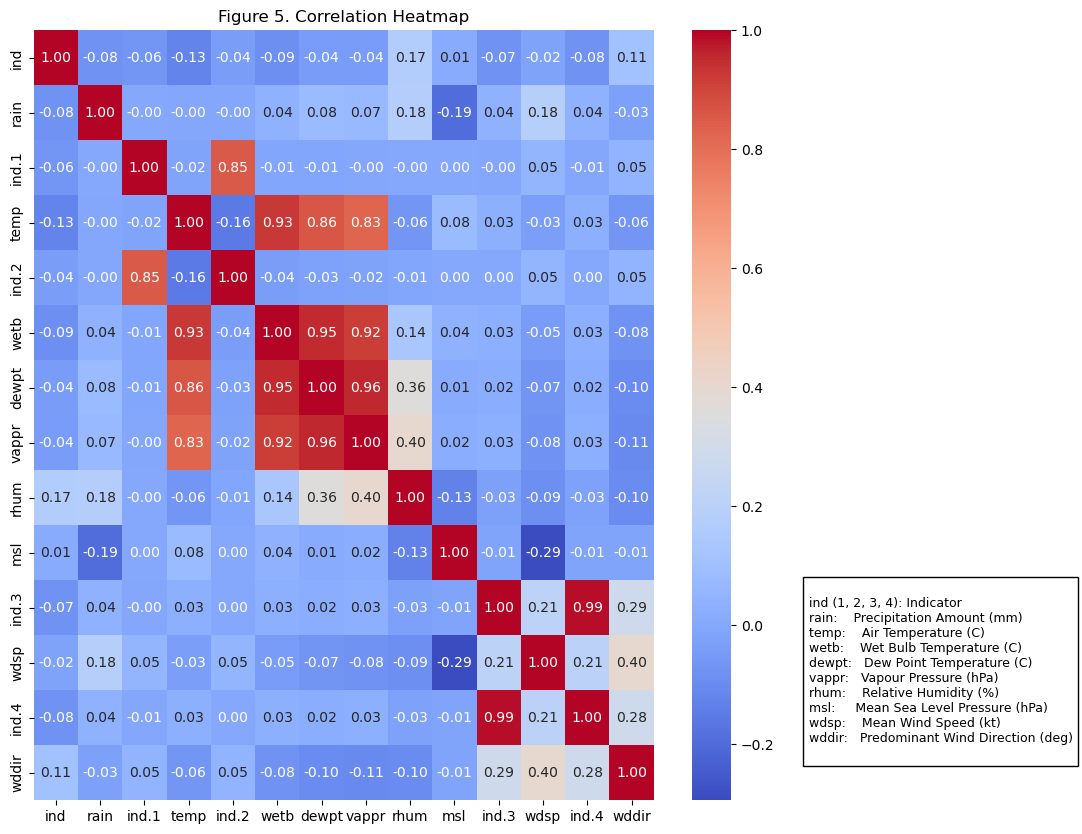

In [225]:

# creating a heatmap of the correlation matrix

plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10)) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # https://seaborn.pydata.org/generated/seaborn.heatmap.html fmt=".2f" to display values with 2 decimal places
plt.title("Figure 5. Correlation Heatmap")

# Define the descriptions
text = """
ind (1, 2, 3, 4): Indicator
rain:    Precipitation Amount (mm)
temp:    Air Temperature (C)
wetb:    Wet Bulb Temperature (C)
dewpt:   Dew Point Temperature (C)
vappr:   Vapour Pressure (hPa)
rhum:    Relative Humidity (%)
msl:     Mean Sea Level Pressure (hPa)
wdsp:    Mean Wind Speed (kt)
wddir:   Predominant Wind Direction (deg)
"""
# Adding text box with descriptions on the right side of the heatmap
fig.text(0.9, 0.15, text, ha='left', va='bottom', fontsize=9, bbox=dict(facecolor='white')) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html


Let's see the relationship between each column with our `wdsp` column. 

In [226]:
print('Corelation with wind speed:')
print(corr_df.corr()['wdsp'])

Corelation with wind speed:
ind     -0.017502
rain     0.182725
ind.1    0.051355
temp    -0.035496
ind.2    0.053979
wetb    -0.046482
dewpt   -0.071118
vappr   -0.079977
rhum    -0.096028
msl     -0.301015
ind.3    0.211882
wdsp     1.000000
ind.4    0.208166
wddir    0.400603
Name: wdsp, dtype: float64


Correlation is considered strong when the correlation coefficient is between 0.7 and 1.0 (positive) or -0.7 and -1.0 (negative), indicating a linear relationship between the variables. Correlations between +/- 0.3 and +/- 0.7 are moderate, and those below +/- 0.3 are weak.

From the above results we can see that only `wddir` *predominant Wind Direction* has moderate correlation with windspeed. 

Because the correlation between wind speed isn't strong I decided to fill the missing values using the following techniques, compare them and select the best one that shows results that might be closest to real values: 

1. **Simple Imputer**: Uses a fixed value like mean, median, or most frequent, which works well for weak to moderate correlations since it doesn’t rely on feature relationships.

2. **Iterative Imputer**: Uses a model to predict missing values based on other features, which can still be effective with weak/moderate correlations as it refines predictions over multiple iterations.

3. **KNN Imputer**: Imputes missing values by considering similar instances, which works well with weak/moderate correlations by leveraging overall feature similarity.

I decided to not use Regression-based Imputation as it can be a bad choice with weak correlations because it assumes strong linear relationships, leading to potential bias and overfitting.

Let's create dataframe `predicted_df` that I will use for filling/predicting missing values as I will be checking various techniques. I will include `wddir` column as has at least moderate correlation with wind speed. 

In [227]:
# create a new copy of the dataframe
predicted_df = cleandf.copy()

# adding wddir to the predicted_df
predicted_df[['wddir']] = df[['wddir']]

# replacing spaces with NaN for the 'wddir' column
predicted_df['wddir'] = predicted_df['wddir'].replace(' ', np.nan)

# adding the hour and day columns to the predicted_df using date time module
predicted_df['hour'] = predicted_df['datetime'].dt.hour
predicted_df['day'] = predicted_df['datetime'].dt.day


##### ***Simple Imputer***
***

My first method to predict and fill the missing data is **Simple Imputer**:

In [228]:
# creating a copy of the dataframe
simple_impute_df = predicted_df.copy()

# Replace 0 values in the 'wdsp' column with NaN
simple_impute_df['wdsp'] = simple_impute_df['wdsp'].replace(0, np.nan)


# Count missing values
print("number on NaN values before :")
print(simple_impute_df['wdsp'].isna().sum())

number on NaN values before :
80282


To check what strategy (mean, median etc) I use, Let's see the windspeed distribution, to check how data is spread. 

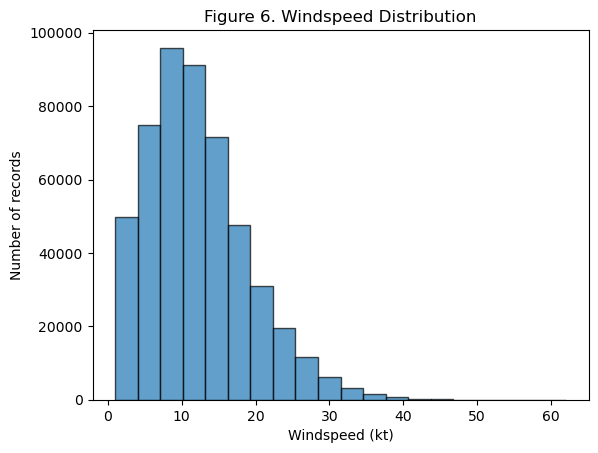

In [ ]:
# plot histogram of the 'wdsp' column
plt.hist(simple_impute_df['wdsp'].dropna(), bins=20, edgecolor='k', alpha=0.7)

# Adding titles and labels
plt.title('Figure 6. Windspeed Distribution')
plt.xlabel('Windspeed (kt)')
plt.ylabel('Number of records')

# Show the plot
plt.show()

The histogram shows a right-skewed distribution with a dominant peak near 10 and a gradual decline as the values increase.
There are many instances of mid-speed values with a tail extending towards higher values. Therefore,  the *most frequent* strategy would be a better choice. This is because the missing windspeed values likely represent the frequent occurrence of mid wind speeds. 

In [230]:
# import simple imputer from sklearn
from sklearn.impute import SimpleImputer # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

# Randomly sample 30% of the data - as the dataset is large
sampled_data_si= simple_impute_df.sample(frac=0.3, random_state=42)

# Selecting relevant columns for imputation
columns_to_impute_si = ['wdsp', 'wddir', 'hour', 'day', 'month', 'year']

# Initialize Simple Imputer with most frequent strategy 
simple_imputer_si = SimpleImputer(strategy='most_frequent')  # Options: 'mean', 'median', 'most_frequent', 'constant'

# Apply Simple Imputer to the sampled dataset
sampled_imputed_data_si = simple_imputer_si.fit_transform(sampled_data_si[columns_to_impute_si]) # https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

# Update the sampled DataFrame with the imputed values
sampled_data_si[columns_to_impute_si] = sampled_imputed_data_si

Let's see the plot:

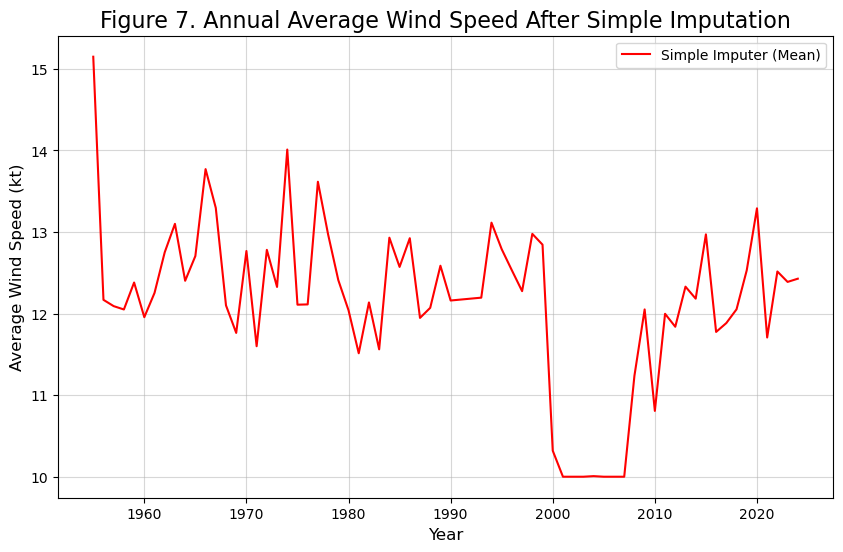

In [231]:
# Group by year and calculate annual averages for 'wdsp'
annual_avg_si = sampled_data_si.groupby('year')['wdsp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Line plot of annual average wind speed
plt.plot(annual_avg_si.index, annual_avg_si.values, label='Simple Imputer (Mean)', color='red')

# Add labels, title, and grid
plt.title('Figure 7. Annual Average Wind Speed After Simple Imputation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wind Speed (kt)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

We can see that average wind speed for the missing months has been updated and now shows approx 10 kt between years 2000 and 2018. 

##### ***Iterative Imputer***
***

In [232]:
# creating a copy of the dataframe for iterative imputation
iterative_impute_df = predicted_df.copy()

# Replace 0 values in the 'wdsp' and 'wddir' column with NaN
iterative_impute_df['wdsp'] = iterative_impute_df['wdsp'].replace(0, np.nan)
iterative_impute_df['wddir'] = iterative_impute_df['wddir'].replace(0, np.nan)

print("number on NaN values before :")
print(iterative_impute_df['wdsp'].isna().sum())

number on NaN values before :
80282


In [233]:
# importing the IterativeImputer from sklearn

from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer # https://scikit-learn.org/dev/modules/generated/sklearn.experimental.enable_iterative_imputer.html
from sklearn.impute import IterativeImputer # https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html



# Randomly sample 30% of the data - as the dataset is large
sampled_data_ii = iterative_impute_df.sample(frac=0.3, random_state=42)

# Selecting relevant columns for imputation
columns_to_impute_ii = ['wdsp', 'wddir', 'hour', 'day', 'month', 'year']

# Initialize IterativeImputer with desired parameters
iterative_imputer_ii = IterativeImputer(max_iter=10, random_state=42)

# Apply Iterative Imputer to the sampled dataset
sampled_imputed_data_ii = iterative_imputer_ii.fit_transform(sampled_data_ii[columns_to_impute_ii]) #https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

# Update the sampled DataFrame with the imputed values
sampled_data_ii[columns_to_impute_ii] = sampled_imputed_data_ii

Let's plot it:

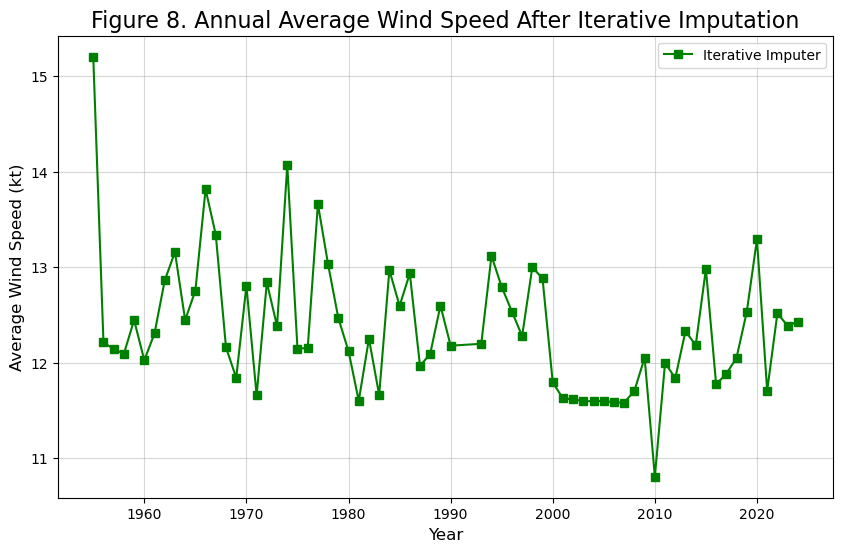

In [234]:
# group by year and calculate annual averages for 'wdsp'
annual_avg_ii = sampled_data_ii.groupby('year')['wdsp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Iterative Imputer results
plt.plot(annual_avg_ii.index, annual_avg_ii.values, marker='s', label='Iterative Imputer', color='green')


# Add labels, title, and grid
plt.title('Figure 8. Annual Average Wind Speed After Iterative Imputation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wind Speed (kt)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

The above plot shows that filled wind speeds are placing between 11 - 12 knots. 

##### ***K-Nearest Neighbors (KNN) Imputer***
***

Now its time to check another technique and use K-Nearest Neighbors (KNN) Imputer. 

In [235]:
# creating a copy of the dataframe for KNN imputation
knn_impute_df = predicted_df.copy()

# replacing spaces with NaN for the 'wddir' column
knn_impute_df['wdsp'] = knn_impute_df['wdsp'].replace(0, np.nan)
knn_impute_df['wddir'] = knn_impute_df['wddir'].replace(0, np.nan) 


print("number on NaN values before :")
print(knn_impute_df['wdsp'].isna().sum())

number on NaN values before :
80282


In [236]:
# import KNN Imputer
from sklearn.impute import KNNImputer

# Randomly sample 10% of the data - as the dataset is large and this will reduce computation time
sampled_data_knn = knn_impute_df.sample(frac=0.1, random_state=42)  

# Selecting relevant columns for imputation
columns_to_impute_knn = ['wdsp', 'wddir','hour', 'day', 'month', 'year']

# Apply KNN Imputer to the sampled dataset
imputer = KNNImputer(n_neighbors=5, weights="uniform")
sampled_imputed_data_knn = imputer.fit_transform(sampled_data_knn[columns_to_impute_knn])

# Update the sampled DataFrame with the imputed values
sampled_data_knn[columns_to_impute_knn] = sampled_imputed_data_knn

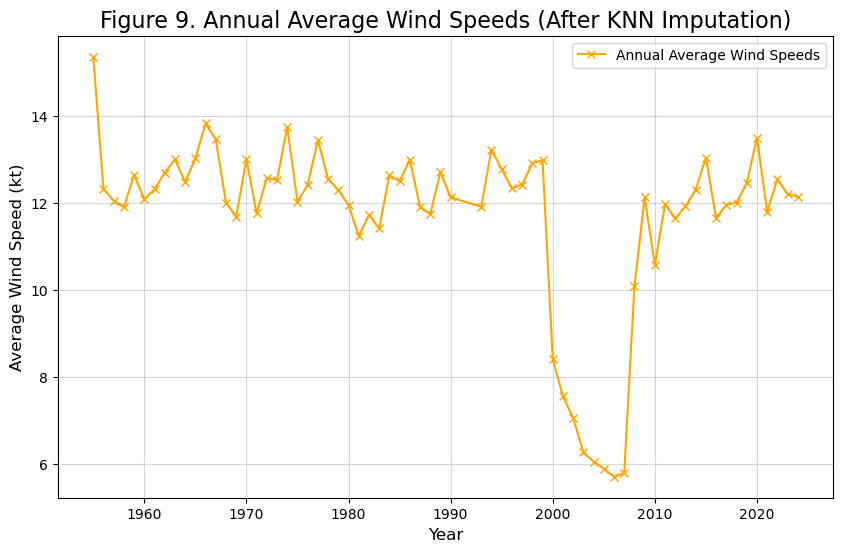

In [237]:

# Group by 'year' and calculate the average wind speed
annual_avg_knn = sampled_data_knn.groupby('year')['wdsp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_knn.index, annual_avg_knn.values, marker='x', label='Annual Average Wind Speeds', color='orange')

# Add labels, title, and grid
plt.title('Figure 9. Annual Average Wind Speeds (After KNN Imputation)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wind Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()

We can observe that KNN Imputation filled the missing data, but the significant fluctuations are also visible in the filled years. Let's all four  plots to compare them. 

#### Comparision of data filling methods
***

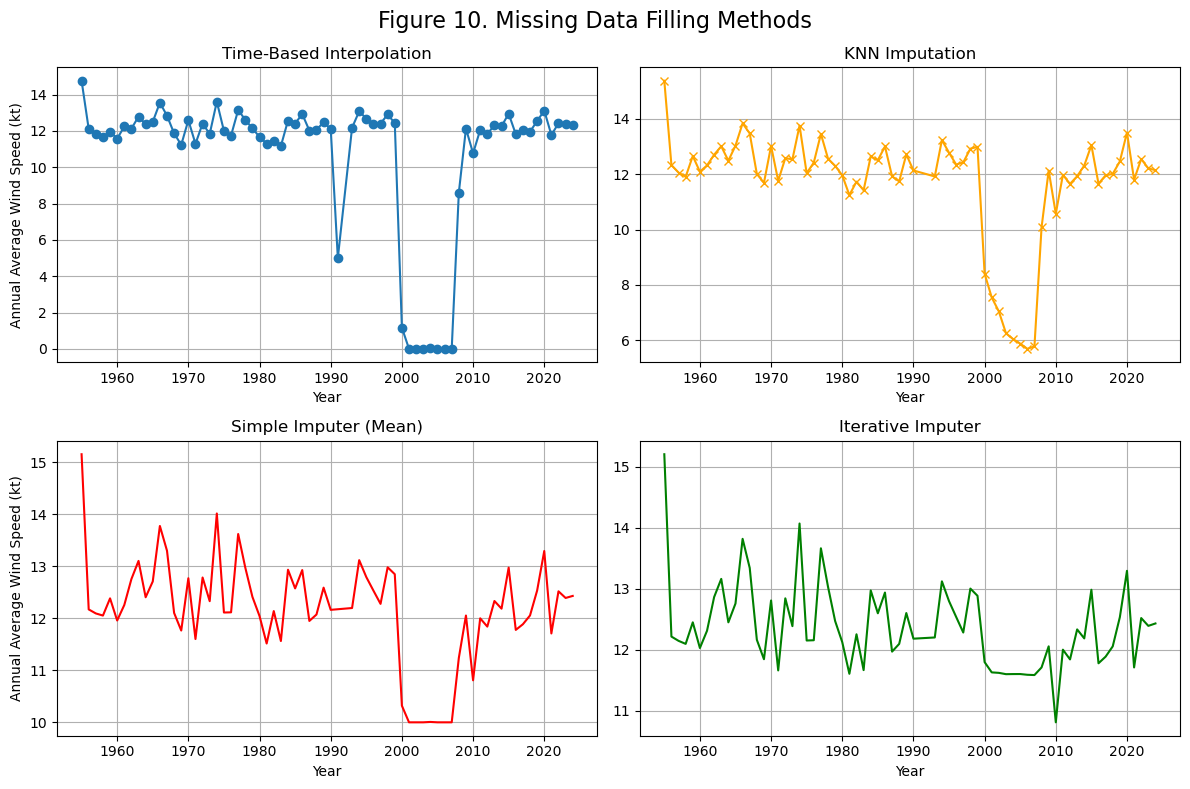

In [ ]:

# Set up a figure with multiple subplots for each imputation method
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# set up the title
fig.suptitle('Figure 10. Missing Data Filling Methods', fontsize=16)


# Plot each imputation method in a separate subplot
axs[0, 0].plot(annual_avg_original.index, annual_avg_original.values, marker='o', label='Time-Based Interpolation')
axs[0, 0].set_title('Time-Based Interpolation')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Annual Average Wind Speed (kt)')
axs[0, 0].grid(True)

axs[0, 1].plot(annual_avg_knn.index, annual_avg_knn.values, marker='x', label='KNN Imputation', color='orange')
axs[0, 1].set_title('KNN Imputation')
axs[0, 1].set_xlabel('Year')
axs[0, 1].grid(True)

axs[1, 0].plot(annual_avg_si.index, annual_avg_si.values, label='Simple Imputer (Mean)', color='red')
axs[1, 0].set_title('Simple Imputer (Mean)')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Annual Average Wind Speed (kt)')
axs[1, 0].grid(True)

axs[1, 1].plot(annual_avg_ii.index, annual_avg_ii.values, label='Iterative Imputer', color='green')
axs[1, 1].set_title('Iterative Imputer')
axs[1, 1].set_xlabel('Year')
axs[1, 1].grid(True)



# Adjust layout for better spacing
plt.tight_layout()

To determine which method is the best one, lets combine all the plots together adding a trendline. I will exclude all zeros this time because I want to find the best fit to the given values in dataset. 
To do this, I will use [linear Regression](https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/)

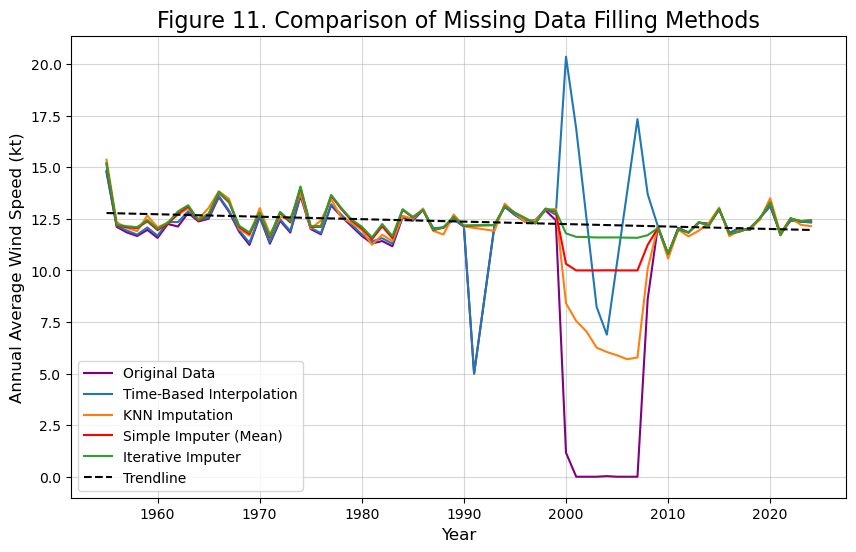

In [ ]:
from sklearn.linear_model import LinearRegression # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Filter out the 0 values (both in X and y)
non_zero = annual_avg_ii.values != 0  # Mask where wind speed is not zero
X = annual_avg_ii.index.values[non_zero].reshape(-1, 1)  # Extract year as the independent variable, excluding zeros
y = annual_avg_ii.values[non_zero]  # Wind speed as the dependent variable, excluding zeros

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the trendline (fitted values)
trendline = model.predict(X)

# Create the figure and plot the original data and imputed data
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(annual_avg_original.index, annual_avg_original.values, label='Original Data', color='purple')

# Plot time-based interpolation results
plt.plot(annual_avg_time_interp.index, annual_avg_time_interp.values, label='Time-Based Interpolation')

# Plot KNN imputation results
plt.plot(annual_avg_knn.index, annual_avg_knn.values, label='KNN Imputation')

# Line plot of annual average wind speed
plt.plot(annual_avg_si.index, annual_avg_si.values, label='Simple Imputer (Mean)', color='red')

# Plot Iterative Imputer results
plt.plot(annual_avg_ii.index, annual_avg_ii.values, label='Iterative Imputer')

# Plot the trendline
plt.plot(X, trendline, label='Trendline', color='black', linestyle='--')

# Add labels, legend, and title
plt.title('Figure 11. Comparison of Missing Data Filling Methods', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Average Wind Speed (kt)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)


Based on the plot, the Iterative Imputer provides the most accurate results by maintaining the general trendline and compared to other imputation methods, making it the best choice for handling missing data in time series with complex patterns. I will use it now in my analysis and treat as fully available 70-year data. 

## Windspeed Analysis
***

### Overview filled data
***

Let's come back to my first plot of monthly average wind speeds. I would like to check how the filled data compares to the original (with missing values) data. 

In [240]:
# Grouping by month and calculating the mean wind speed
monthly_avg_ii = sampled_data_ii.groupby('month')['wdsp'].mean()

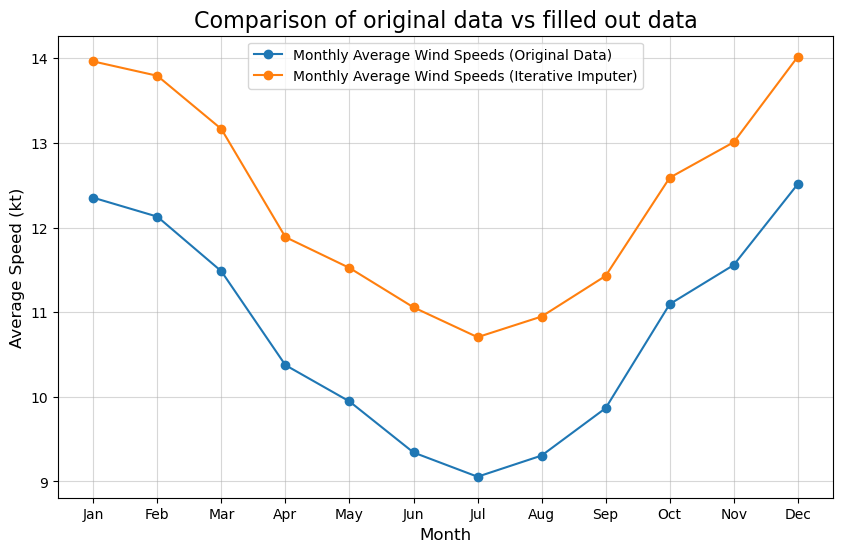

In [241]:
# Plotting the monthly average wind speed
plt.figure(figsize=(10, 6))

# line plot
plt.plot(monthly_avg_original.index, monthly_avg_original.values, marker='o', label='Monthly Average Wind Speeds (Original Data)')
plt.plot(monthly_avg_ii.index, monthly_avg_ii.values, marker='o', label='Monthly Average Wind Speeds (Iterative Imputer)')

# adding title and labels
plt.title('Comparison of original data vs filled out data', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)
plt.legend()

# setting the x-axis labels to the month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.grid(alpha=0.5)

The **Original Data (blue)** shows a typical seasonal pattern for wind speed, with higher wind speeds in the winter months (January, February) and lower wind speeds in the summer months (June, July). This is a typical behavior for many regions where wind speeds are generally stronger in colder months and weaker during warmer months.

The **Iterative Imputer (orange)** also follows a similar seasonal pattern, but the values are noticeably higher than the original data, especially in the summer months (May through August), suggesting that the imputation method (Iterative Imputer) has filled the missing values by inflating them.

Based on the plot, we can observe the following trends in average wind speeds across months:

1. Seasonal Variations
- Wind speed are highest in winter months with January and December the highest (December is showing the peak)
- Summer months have the lowest average wind speeds with July the lowest. 

2. Transition Periods
- Wind speeds decrease from January to July, reaching their lowest in mid-summer
- From August, wind speeds begin to increase, with a sharp rise during autumn (September to December).

3. Potential Insights:
- The data suggests a seasonal cycle where wind speeds peak during the colder months and dip during the warmer months.
- This information could be critical for planning wind energy projects, as energy output would vary seasonally, with higher potential in winter and lower output in summer.

Now let's see some statistical analysis. I will create a new dataframe `cleared_prepared_df` and I will use it for my analysis as cleared, preprocessed and filled dataset. 

In [242]:
# adding date and time columns to the sampled_data_ii
sampled_data_ii['hour'] = sampled_data_ii['datetime'].dt.hour
sampled_data_ii['day'] = sampled_data_ii['datetime'].dt.day
sampled_data_ii['month'] = sampled_data_ii['datetime'].dt.month
sampled_data_ii['year'] = sampled_data_ii['datetime'].dt.year

In [243]:
# creating a copy of the dataframe for analysis
cleared_prepared_df = sampled_data_ii.copy()
cleared_prepared_df.head()


,wdsp,datetime,date,time,month,year,wddir,hour,day
308510,15.0,1993-03-12 15:00:00,1993-03-12,15:00:00,3,1993,140.0,15,12
153675,13.0,1973-06-12 04:00:00,1973-06-12,04:00:00,6,1973,220.0,4,12
523614,10.0,2017-11-07 08:00:00,2017-11-07,08:00:00,11,2017,290.0,8,7
542254,12.0,2019-12-24 00:00:00,2019-12-24,00:00:00,12,2019,240.0,0,24
509798,27.0,2016-04-10 16:00:00,2016-04-10,16:00:00,4,2016,100.0,16,10


In [244]:
# Basic checks on the dataset

print(f'Number of NaN values: {cleared_prepared_df.isnull().sum()}')

print(f'Data type of dataset: {cleared_prepared_df["wdsp"].dtype}')

print(f'Number of zero values in wdsp column: {(cleared_prepared_df["wdsp"] == 0).sum()}')

print(f'Unique values: {cleared_prepared_df["wdsp"].unique()}')


Number of NaN values: wdsp        0
datetime    0
date        0
time        0
month       0
year        0
wddir       0
hour        0
day         0
dtype: int64
Data type of dataset: float64
Number of zero values in wdsp column: 0
Unique values: [15.         13.         10.         ... 11.57243101 12.13841871
 12.207981  ]


Our cleared and prepared data frame for `wdsp` columns contains now only floating-point values.

In [245]:
# Total number of non-missing observations
print(f'Total value of wind speed entries is: {cleared_prepared_df["wdsp"].count()}')

Total value of wind speed entries is: 175565


#### Basic Statistics
***

***Summary statistics***

In [246]:
# Mean (Average)
wdsp_mean = cleared_prepared_df['wdsp'].mean()

# Median
wdsp_median = cleared_prepared_df['wdsp'].median()

# Standard Deviation 
wdsp_std = cleared_prepared_df['wdsp'].std()

# Minimum and Maximum
wdsp_min = cleared_prepared_df['wdsp'].min()
wdsp_max = cleared_prepared_df['wdsp'].max()

# Print the results
print(f"Mean Wind Speed: {wdsp_mean:.2f} kt")
print(f"Median Wind Speed: {wdsp_median:.2f} kt")
print(f"Standard Deviation: {wdsp_std:.2f} kt")
print(f"Minimum Wind Speed: {wdsp_min:.2f} kt")
print(f"Maximum Wind Speed: {wdsp_max:.2f} kt")



Mean Wind Speed: 12.33 kt
Median Wind Speed: 11.62 kt
Standard Deviation: 6.31 kt
Minimum Wind Speed: 1.00 kt
Maximum Wind Speed: 55.00 kt


***Frequency-Based Statistics***


In [247]:
# Most frequently occurring wind speed
wdsp_mode = cleared_prepared_df['wdsp'].mode().values[0] # [0] to get the first mode if multiple exist

# Print the mode
print(f"Most frequent Wind Speed: {wdsp_mode:.2f} kt")


Most frequent Wind Speed: 10.00 kt


***Time-Based Summary Statistics***

In [248]:
# Seasonal Average Wind Speed:
seasonal_avg = cleared_prepared_df.groupby(cleared_prepared_df['datetime'].dt.quarter)['wdsp'].mean()

# Print the results
print("\nSeasonal Averages:")
print(seasonal_avg)



Seasonal Averages:
datetime
1    13.634927
2    11.489162
3    11.021153
4    13.209097
Name: wdsp, dtype: float64


### Trends in windspeed
***

Let's plot the average wind speed for each quarter.

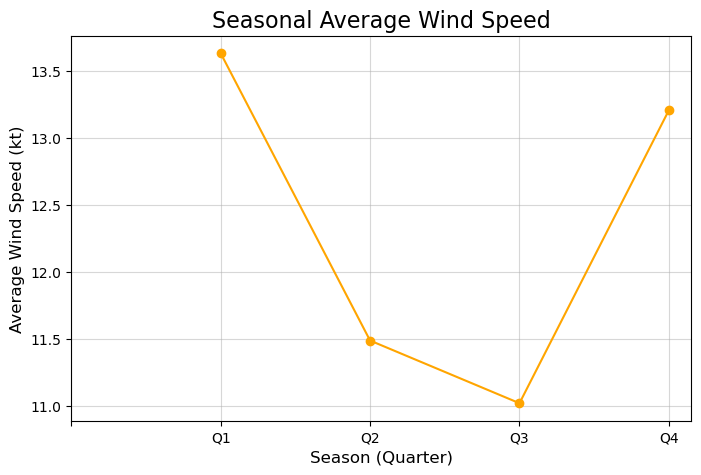

In [249]:
plt.figure(figsize=(8, 5))
seasonal_avg.plot(kind='line', marker='o', color='orange')

# Adding titles and labels
plt.title('Seasonal Average Wind Speed', fontsize=16)
plt.xlabel('Season (Quarter)', fontsize=12)
plt.ylabel('Average Wind Speed (kt)', fontsize=12)

# Customizing the x-ticks to make the quarters
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[' ', 'Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
plt.grid(alpha=0.5)



The plot shows a U-shaped trend in wind speed across the year, with the highest average wind speed in Q1 (Winter) at over 13.5 knots, a sharp drop in Q2 (Spring) to 11.5 knots, another slight drop in Q3 (Summer) to 11.0 knots, and increase in Q4 (Autumn) to over 13.0 knots. This seasonal variation suggests stronger winds in colder months and calmer conditions in spring and summer, reflecting typical seasonal wind patterns.

Let's do some more plots. I would like to check 24 hour average wind speed to see in what times a day typically wind is the strongest. 

In [250]:
# Average wind speed per year.
annual_avg = cleared_prepared_df.groupby('year')['wdsp'].mean()

In [251]:
# Average wind speed by hour.
hourly_avg = cleared_prepared_df.groupby('hour')['wdsp'].mean()

Text(134.72222222222223, 0.5, '')

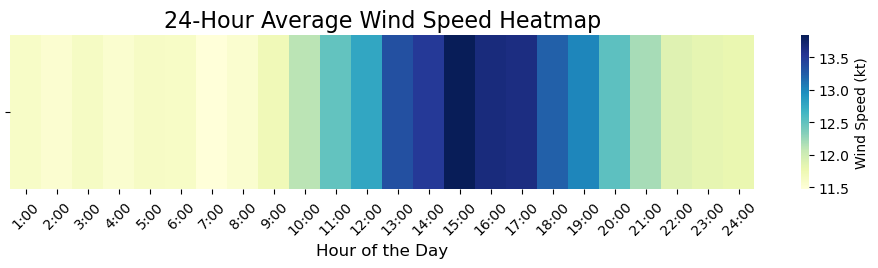

In [252]:
# let's plot the hourly average wind speed
heatmap_data = np.reshape(hourly_avg.values, (1, -1)) # Reshape the data for the heatmap

# Plotting the heatmap
plt.figure(figsize=(12, 2))  # Adjust size to make it wider
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Wind Speed (kt)'}, xticklabels=[f'{i}:00' for i in range(1, 25)], yticklabels=[''])

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Adding titles and labels
plt.title('24-Hour Average Wind Speed Heatmap', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('')


The heatmap shows consistent wind speeds throughout the 24-hour period, with little variation in intensity. The wind speeds range from 11.5 to 13.5 knots, indicating stable conditions with peaks in the afternoon. This suggests a location with moderate and steady winds, potentially ideal for activities like wind power generation.

Now, lets check is there a noticeable trend in overall wind speed across the years. This would help us predict whether the wind will be stronger, weaker or remains stable for the next years. For plotting the trend I will use [Linear Regression](https://pyfi.com/blogs/articles/linear-trend-and-regression) method.

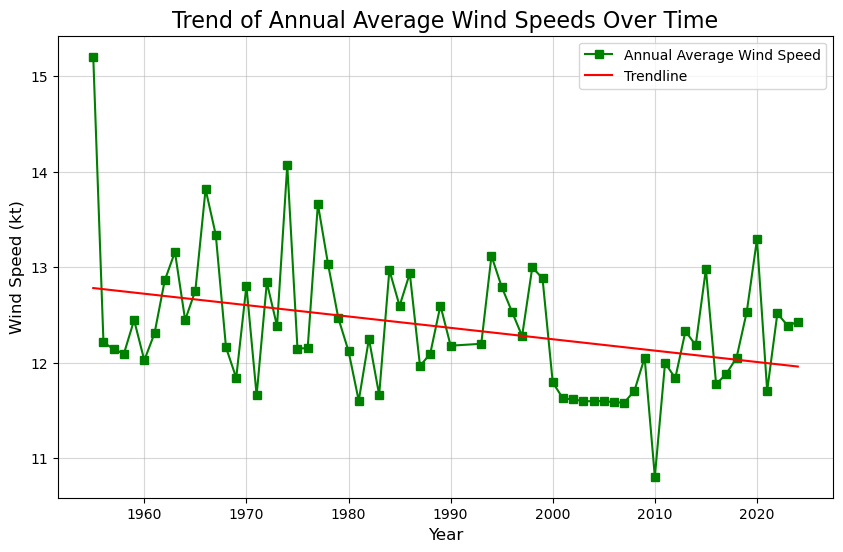

Slope of trendline: -0.0119 kt/year


In [253]:
from sklearn.linear_model import LinearRegression
X = annual_avg_ii.index.values.reshape(-1, 1)  # Extract year as the independent variable
y = annual_avg_ii.values  # Wind speed is the dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the trendline (fitted values)
trendline = model.predict(X)

# Plot the data and trendline
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_ii.index, annual_avg_ii.values, marker='s', color= 'green', label='Annual Average Wind Speed')
plt.plot(annual_avg_ii.index, trendline, color='red', label='Trendline')

# Add labels, title, and grid
plt.title('Trend of Annual Average Wind Speeds Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wind Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# Print the slope of the trendline
print(f"Slope of trendline: {model.coef_[0]:.4f} kt/year")

The plot shows the trend of annual average wind speeds over time, with data points plotted for each year. 

The red trendline shows a general decrease in the wind speed over time, with a slope of -0.0119 kt/year. This means, on average, the annual wind speed is decreasing by approximately 0.012 knots per year. As a potential long - term analysis, the wind speeds are gradually getting lower. This could be indicative of a longer-term environmental or climatic change. 

### Potential Wind Energy
***


To address next question from my project goal ***'What is the potential wind energy output for this location based on historical data?'*** I need to get specific information about how much power can wind generate. Wind energy is produced when we use the power of our atmosphere’s airflow to create electricity. Wind turbines do this by capturing the kinetic energy of the wind. See [inspirecleanenergy.com](https://www.inspirecleanenergy.com/blog/clean-energy-101/how-much-energy-does-wind-turbine-produce) for more very interesting information about wind turbines and energy type they can produce. 

The power generated by wind turbines and is calculated using the wind power formula, which accounts for the wind speed and turbine-specific parameters. 

For the analysis I will select turbine ***Vestas V80-1.8***. All the specifications are available on [en.wind-turbine-models.com](https://en.wind-turbine-models.com/turbines/1350-vestas-v80-1.8)

According to [windexchange.energy.gov](https://windexchange.energy.gov/small-wind-guidebook#generate) the power generated by the wind is given by:

$ P = 1/2 ⋅ ρ ⋅ A ⋅ v^3 $

Where:
- $P$ : Power generated (in watts, W)
- $𝜌$ : Air density (typically $1.225 kg/m^3$ at sea level and 15°C)
- $A$ : Rotor swept area (in $m^2$)= $ 𝜋⋅𝑅^2 $, where  $𝑅$  is the rotor radius
- $𝑣$ : Wind speed (in $m/s$)


We also need to take into account that no turbine is 100% efficient. According to [Betz's law](https://en.wikipedia.org/wiki/Betz%27s_law) we should use  capacity factor or efficiency (e.g., Betz's limit: 59.3% or ~0.593, but practical turbines achieve ~30–45%).

Power is only generated when wind speeds are within the turbine's operational range:

- **Cut-in speed**: Minimum wind speed (3-4 m/s or 6–8 kt) to generate power.
- **Rated speed**: Wind speed at which maximum power is generated.
- **Cut-out speed**: Maximum wind speed (~25 m/s or 48 kt) before turbine shuts down for safety.

This information can be found here: [www.researchgate.net](https://www.researchgate.net/figure/Speed-requirement-for-some-popular-wind-turbine-models-21-25_tbl1_336600978)

Now, let's implement the above formulas into my data. For the calculations I will use $m/s$ , therefore I need to convert wind speeds from knots (kt) to meters per second (m/s):
$1 kt =0.514444  m/s$

In [254]:
# calculate the wind speed in m/s
cleared_prepared_df['wind_speed_mps'] = cleared_prepared_df['wdsp'] * 0.514444

I have to define constants such as air density, rotor radius, and turbine efficiency:

In [255]:
# Constants
rho = 1.225  # Air density in kg/m^3
R = 40       # Rotor radius in meters (Vestas V80-1,8 is 80m diameter turbine)
eta = 0.4    # setting up efficiency (40%)
A = np.pi * R**2  # Rotor swept area in m^2

Now, I will apply the wind power formula: 

In [256]:
cleared_prepared_df['wind_power'] = 0.5 * rho * A * (cleared_prepared_df['wind_speed_mps']**3) * eta

and apply the cut-In and cut-out Speeds:

In [257]:
# Cut-in and cut-out speeds in m/s

cut_in = 4 # (Vestas V80-1,8 cut in speed is 4m/s)
cut_out = 25 # (Vestas V80-1,8 cut out speed is 25m/s)

# Apply constraints
cleared_prepared_df['wind_power'] = np.where( # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html
    (cleared_prepared_df['wind_speed_mps'] >= cut_in) & (cleared_prepared_df['wind_speed_mps'] <= cut_out),
    cleared_prepared_df['wind_power'], 0)  # No power generated outside the operational range

Now let's aggregate power generation over different time periods (daily, monthly, annually):

In [258]:
# setting up the datetime as the index
cleared_prepared_df.set_index('datetime', inplace=True)


In [259]:
# Aggregate power by time intervals
annual_power = cleared_prepared_df['wind_power'].resample('YE').sum()
monthly_power = cleared_prepared_df['wind_power'].resample('ME').sum()
daily_power = cleared_prepared_df['wind_power'].resample('D').sum()



Let's plot annual wind power aggregation over time. 

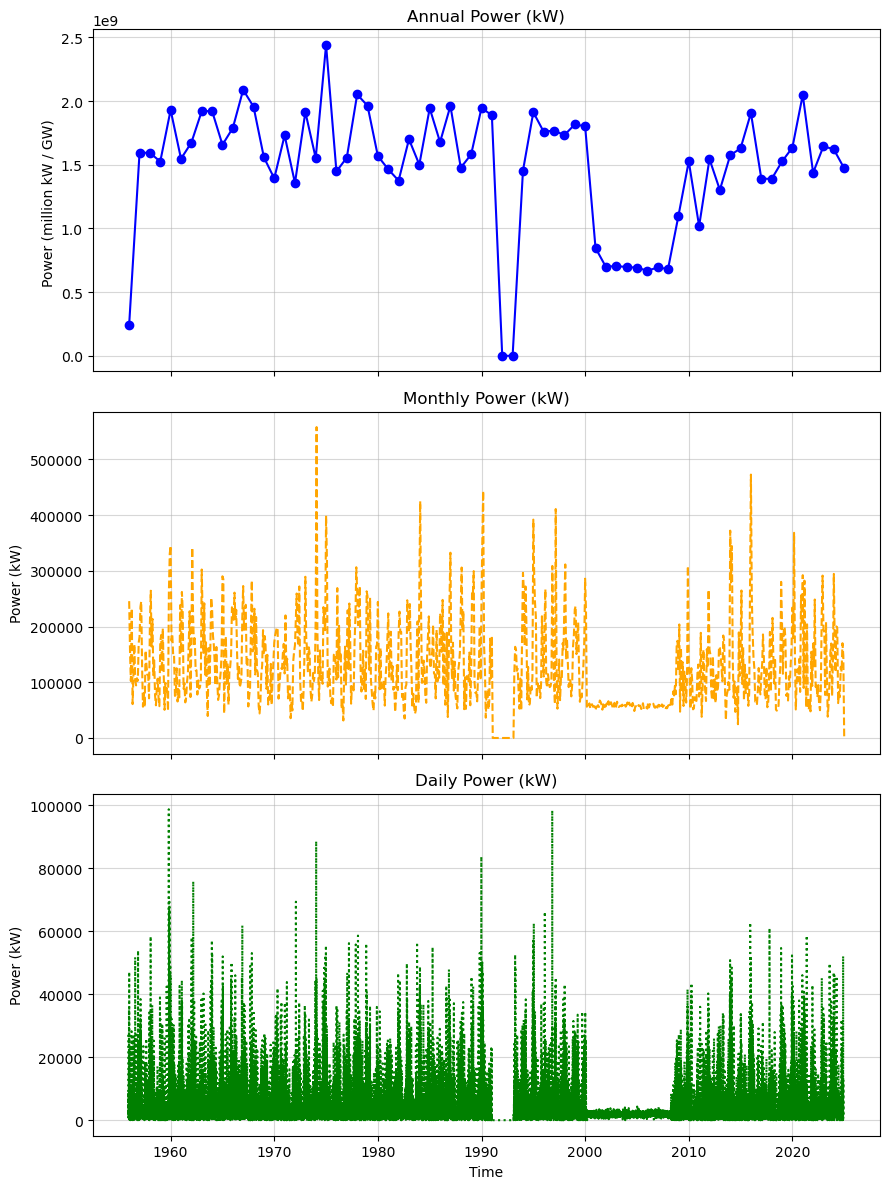

In [ ]:
ig, axs = plt.subplots(3, 1, figsize=(9, 12), sharex=True) # sharex to share the x-axis

# Annual power
axs[0].plot(annual_power.index, annual_power.values, color='blue', marker='o')
axs[0].set_title('Annual Power (kW)')
axs[0].set_ylabel('Power (million kW / GW) ')
axs[0].grid(alpha=0.5)

# Convert kW to MW by dividing by 1000
monthly_power_MW = monthly_power / 1000
daily_power_MW = daily_power / 1000

# Monthly power
axs[1].plot(monthly_power_MW.index, monthly_power_MW.values, color='orange', linestyle='--')
axs[1].set_title('Monthly Power (MW)')
axs[1].set_ylabel('Power (MW)')
axs[1].grid(alpha=0.5)

# Daily power
axs[2].plot(daily_power_MW.index, daily_power_MW.values, color='green', linestyle=':')
axs[2].set_title('Daily Power (MW)')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Power (MW)')
axs[2].grid(alpha=0.5)

plt.tight_layout()

***Annual Power (kW)***: This plot displays yearly power generation, with values fluctuating between 0,2 and 2.5 million kW. We can see significant differences in places where I filled artificial data. Ignoring the drops between 1991 and 2000-2008, the annual power output shows a consistent trend with steady production over the years balancing between 1 and 2.5 million kw (1-2.5 gigawatt). 

***Monthly Power (kW)***: In this plot, the monthly power data is shown with a lot of rapid fluctuations, especially around some years where the values go up significantly. Peaks in power demand or generation could indicate seasonal changes, which is common for renewable energy sources like wind that are heavily influenced by the time of year.

***Daily Power (kW)***: The daily data is shown in a dense time series with notable spikes in power output. This suggests there may be variation in daily generation, which could depend on daily environmental conditions. 

For the seasonal and daily variability, excluding the dips during the 1991-2000/2008 period, the monthly and daily power fluctuations suggest seasonal patterns, but overall we can tell that the power might be generated in stable, windy environment. 
The consistent pattern of power generation could meet farming energy needs with proper management of seasonal fluctuations. However how much power should a wind farm produce to be effective?

To be considered for a wind farm, the turbine must produce a meaningful amount of energy. 

According to [inspirecleanenergy](https://www.inspirecleanenergy.com/blog/clean-energy-101/how-much-energy-does-wind-turbine-produce), a wind turbine rated at 1.8 megawatts can produce in excess of 3,6 (GWh) every year. Let's see how much energy our single [***Vestas V80-1.8***](https://en.wind-turbine-models.com/turbines/1350-vestas-v80-1.8) turbine can produce if would be built around Rochest Point station in County Cork. 

[Energy Calculation](https://www.toppr.com/ask/question/the-formula-ept-gives-the-energy-e-watthours-used-when-an-electrical-appliance-of-power/): Energy is the total power produced over time:
$E = P * t $ 


Where: 

- $E$ : Energy in kilowatt-hours (kWh) or megawatt-hours (MWh)
- $P$ : Power in kilowatts (kW)
- $t$ : Time in hours

[Turbine Power Curve](https://theroundup.org/wind-turbine-power-curve/): Each wind turbine has a power curve that relates wind speed $(𝑣)$ to power output $(𝑃)$

- **Cut-in Speed:** Minimum wind speed to start generating power.
- **Rated Speed:** Wind speed at which the turbine produces maximum power.
- **Cut-out Speed:** Maximum wind speed beyond which the turbine shuts down for safety.
- **Wind Speed Distribution:** Calculate how often wind speeds fall into certain bins (hourly wind speed data).

[***Vestas V80-1.8***](https://en.wind-turbine-models.com/turbines/1350-vestas-v80-1.8) turbine specifications:

- Rated capacity $(𝑃rated)$ in kilowatts 1,800 kW for a 1.8 MW turbine.
- Cut-in wind speed: 4 m/s
- rated wind speed: 15 m/s
- cut-out wind speed:  25 m/s.

Let's estimate the energy production of a wind turbine over time, aggregate into monthly and annual periods, based on varying wind speeds.

The formula used in the `turbine_power_curve` function calculates the power output of a wind turbine based on the wind speed, following a typical wind turbine power curve. I found similar code on the website [here](https://www.kaggle.com/code/winternguyen/wind-power-curve-modeling) and applied accordingly with a help of chat GPT. 

When the wind speed is below the cut-in speed, the turbine does not generate any power. Between Cut-In and Rated Speed: Power increases linearly from 0 to the rated capacity based on this formula:

$P = rated.capacity × (wind.speed − cut.in) / (rated_speed − cut.in)× η $

Where $η$ : Efficiency factor


When the wind speed is between the rated wind speed and the cut-out wind speed, the turbine generates its maximum output $P = rated.capacity × eta$. Above Cut-Out Speed no power is generated (P = 0).

In [261]:
# Turbine parameters
rated_capacity = 1800  # Rated capacity in kW
rated_speed = 15       # Rated wind speed in m/s

In [262]:

def turbine_power_curve(wind_speed):
    if wind_speed < cut_in:  # Below cut-in speed, no power generated
        return 0
    elif cut_in <= wind_speed < rated_speed:  # Between cut-in and rated speed, power increases linearly
        return rated_capacity * (wind_speed - cut_in) / (rated_speed - cut_in) * eta
    elif rated_speed <= wind_speed <= cut_out:  # Between rated and cut-out speed, maximum power
        return rated_capacity * eta
    else:  # Above cut-out speed, no power generated
        return 0

In [263]:
# Apply the turbine power curve
cleared_prepared_df['power_output_kw'] = cleared_prepared_df['wind_speed_mps'].apply(turbine_power_curve) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [264]:
# Calculate energy produced at each time step
cleared_prepared_df['energy_kwh'] = cleared_prepared_df['power_output_kw']

# Aggregate energy over time (annually, monthly, etc.)
total_energy_annual = cleared_prepared_df['energy_kwh'].resample('YE').sum()  # Annual energy in kWh
total_energy_monthly = cleared_prepared_df['energy_kwh'].resample('ME').sum()  # Monthly energy in kWh

# calculate mean energy produced per month
mean_energy_monthly = cleared_prepared_df['energy_kwh'].resample('ME').mean()

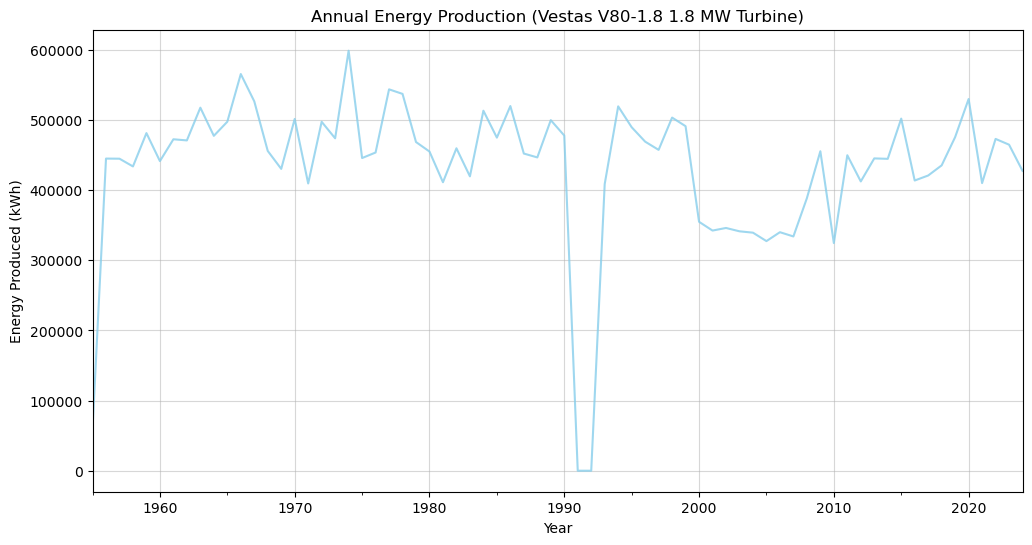

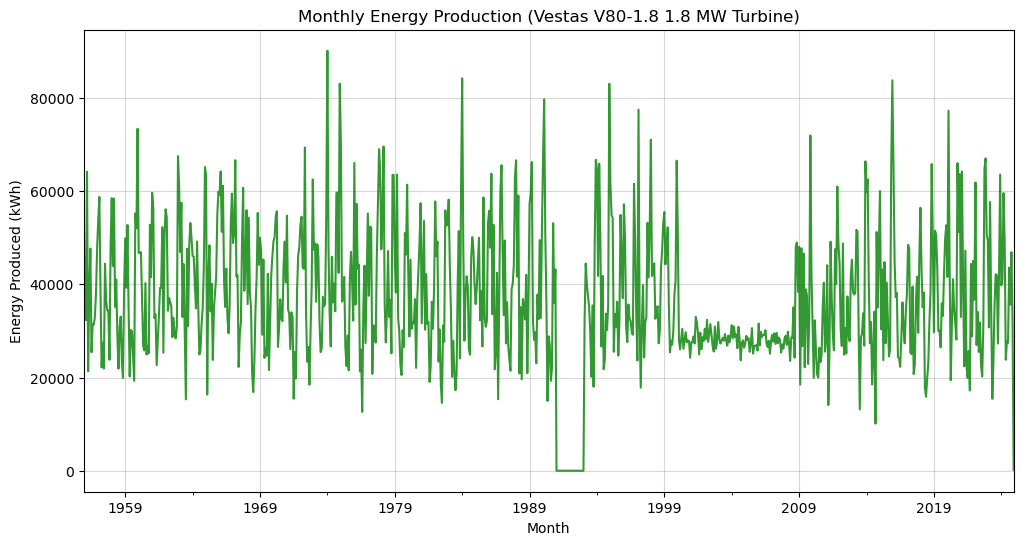

In [265]:
# Plot annual energy production
plt.figure(figsize=(12, 6))
total_energy_annual.plot(kind='line', color='skyblue', alpha=0.8)
plt.title('Annual Energy Production (Vestas V80-1.8 1.8 MW Turbine)')
plt.xlabel('Year')
plt.ylabel('Energy Produced (kWh)')
plt.grid(alpha=0.5)
plt.show()


# Plot monthly energy production
plt.figure(figsize=(12, 6))
total_energy_monthly.plot(kind='line', color='green', alpha=0.8)
plt.title('Monthly Energy Production (Vestas V80-1.8 1.8 MW Turbine)')
plt.xlabel('Month')
plt.ylabel('Energy Produced (kWh)')
plt.grid(alpha=0.5)
plt.show()




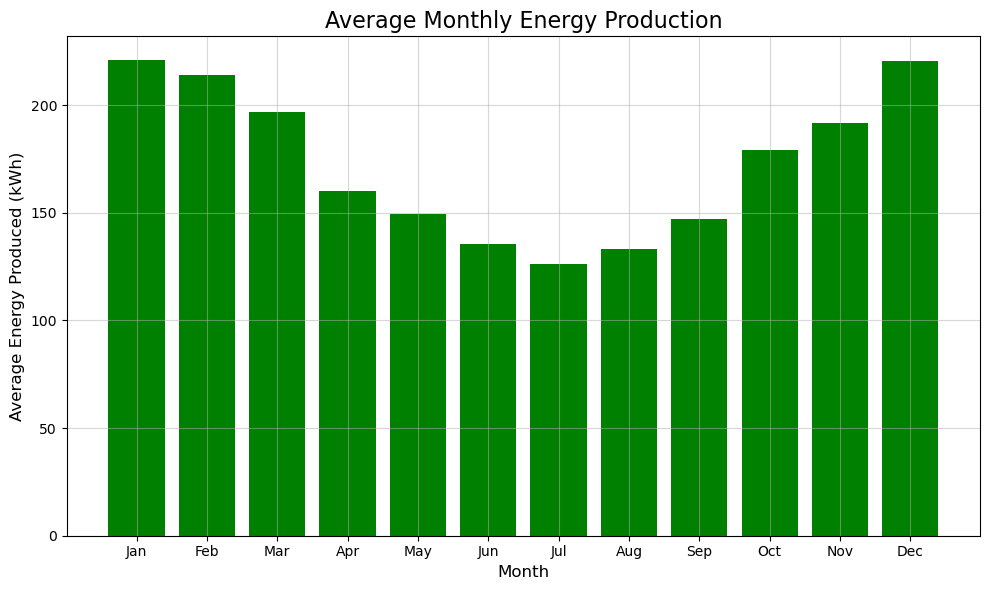

In [266]:
# Group by month and calculate the mean energy produced
monthly_avg_energy = cleared_prepared_df.groupby('month')['energy_kwh'].mean()

# Reset the index to make 'month' a regular column again
monthly_avg_energy = monthly_avg_energy.reset_index()

# Create a bar plot for the average monthly energy produced
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_energy['month'], monthly_avg_energy['energy_kwh'], color='green')

# Customize the plot
plt.title('Average Monthly Energy Production', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Energy Produced (kWh)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.tight_layout()



Based on these plots here are my observations that can help assess the potential efficiency of a Vestas V80 1.8 MW turbine in the Roches Point area in Cork for covering energy demand:

1. Annual Energy Production (Top Plot):
The annual energy production shows variability over time, with some years producing higher energy and others producing less. However, the production remains relatively stable over the years, with a few sharp drops. 
These fluctuations are likely related to the wind conditions in the area. The stable but fluctuating nature suggests that while a turbine could produce a steady amount of power over the years, external factors like maintenance, downtime, or periods of low wind may cause production dips.

2. Monthly Energy Production (Middle Plot):
The monthly energy production plot shows significant variations, with noticeable spikes, especially in some months. These spikes suggest that the turbine may produce significantly more energy during certain months, likely during periods of strong winds (winter time).
However, the variation is also quite high, indicating that there could be months of lower production, especially when wind speeds are not optimal. This means there are months where the turbine might not generate sufficient energy to meet the demand.

3. Seasonal Variation of Energy production (Bottom Plot):
The highest energy production occurs in December and January, suggesting that these months likely experience higher energy production, while summer months shows lower production, which is dictated by lower wind speed. This suggests that the wind farm could maintain a relatively stable output throughout the year, but with reduced production during the summer.

**Conclusion on Efficiency:**

The variability in annual and monthly energy production indicates that while the Vestas V80 1.8 MW turbine can provide a significant amount of energy, it may not be enough to cover energy demand on its own.

In areas like Roches Point, which generally have strong winds due to its coastal location, this turbine can produce a good amount of energy but may face gaps during months of low wind. For a wind farm to be efficient in meeting the energy demand, a combination of turbines (typically more than one) might be necessary to balance out these variations, especially considering backup solutions like solar panels that could cover the energy production during summer time, when the wind is lower.

But would wind farm cover the energy consumption of Cork area? In 2019 Cork has released ***Cork's Energy Master Plan*** that provides a plan for reducing Cork's energy demand, also identifying energy consumption as of 2016. This analysis can be found at [www.energycork.ie](https://www.energycork.ie/index.php/portfolio/corks-energy-master-plan/)

The Cork Energy Master Plan (EMP) outlines Cork's ambition to reduce energy demand by 35% by 2030 and achieve 53% renewable energy penetration by the same year. In 2016, Cork's total energy consumption was 13,767 GWh (13.8 billion kWh), with a clear focus on transitioning towards a more sustainable energy future.

My analysis of the single Vestas 1.8 MW wind turbine shows that while it generates between 30,000 kWh to 55,000 kWh annually, this amount is a small fraction of Cork's total energy demand, covering only 0.0004% of the annual consumption. 

The seasonal variability in wind energy production highlights the opportunity for integrating wind with other renewable sources, such as solar power. These efforts would help balance out low wind periods, ensuring a more consistent and reliable energy supply.

To meet Cork's ambitious renewable energy targets by 2030, scaling up wind energy production through wind farms will be essential. While a single turbine won't meet the entire demand, expanding capacity will significantly contribute to reducing fossil fuel dependency and supporting Cork's transition to a sustainable energy future.

## References:
***
All the references are also placed throughout the notebook at the points where they were used.

https://docs.python.org/3/library/datetime.html

https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis

https://stackoverflow.com/questions/50088007/print-specific-rows-and-columns-in-pandas

https://pandas.pydata.org/docs/reference/api/pandas.concat.html